# Multimodal RAG

Hướng dẫn này trình bày cách xây dựng hệ thống Multimodal RAG (Retrieval-Augmented Generation) bằng LangChain. Hệ thống xử lý cả văn bản và hình ảnh từ tài liệu, tạo một cơ sở tri thức thống nhất cho việc trả lời câu hỏi.

![Multimodal RAG Architecture](assets/10-GeminiMultimodalRAG-Architecture.png)


```bash
pip install pymupdf4llm langchain-chroma

```

In [2]:
# # Basic setup
# import os
# from langchain_ollama import ChatOllama
# from langchain_ollama.embeddings import OllamaEmbeddings
# from langchain_chroma import Chroma

# llm_model_name='qwen2.5:7b'
# llm = ChatOllama(model=llm_model_name, temperature=0)

# embedding_model='bge-m3:latest'
# embeddings = OllamaEmbeddings(model=embedding_model)

# vectorstore = Chroma(
#     collection_name="GTDB_35_v3",
#     embedding_function=embeddings,
#     persist_directory="data/chroma_GTDB_35_db", 
# )

# retriever = vectorstore.as_retriever(
#   search_type="similarity",
#   search_kwargs={'k': 4}, # number of documents to retrieve
# )

## Extract and preprocess Text contents from PDF using `PyMuPDF4LLM`

### `PyMuPDF4LLM`

`PyMuPDF4LLM` là một gói Python được thiết kế để hỗ trợ trích xuất nội dung PDF thành các định dạng phù hợp cho Large Language Models (LLMs) và môi trường Retrieval-Augmented Generation (RAG). Nó hỗ trợ trích xuất Markdown và đầu ra tài liệu LlamaIndex, biến nó thành một công cụ có giá trị để phát triển các ứng dụng AI dựa trên tài liệu.

### Các tính năng chính

- **Hỗ trợ trang nhiều cột (Multi-Column Page Support)**: Trích xuất văn bản chính xác từ các trang có nhiều cột.

- **Trích xuất hình ảnh và đồ họa vector (Image and Vector Graphics Extraction)**: Trích xuất hình ảnh và đồ họa vector từ các trang, bao gồm các tham chiếu trong văn bản Markdown.

- **Đầu ra chia nhỏ trang (Page Chunking Output)**: Xuất các trang theo từng đoạn (chunk), tạo điều kiện thuận lợi cho việc sử dụng trong các hệ thống LLM và RAG.

- **Đầu ra tài liệu LlamaIndex (LlamaIndex Document Output)**: Chuyển đổi trực tiếp các tệp PDF sang định dạng tài liệu LlamaIndex.


In [8]:
import pymupdf4llm

file_path = 'data/vneid.pdf'

# to_markdown() function extracts text content and converts it into markdown format
md_text = pymupdf4llm.to_markdown(
    doc=file_path,  # Tệp, có thể là đường dẫn tệp hoặc một PyMuPDF Document.
    page_chunks=True,  # Nếu True, đầu ra là một danh sách các từ điển dành riêng cho từng trang.
    show_progress=True,  # Hiển thị thanh tiến trình trong quá trình xử lý.
    # pages=[0, 1, 2],  - Tùy chọn, chỉ định số trang (bắt đầu từ 0) để xử lý.
    # hdr_info=False,  - Tùy chọn, tắt logic phát hiện tiêu đề.
    # write_images=True,  - Lưu hình ảnh tìm thấy trong tài liệu thành các tệp.
    embed_images=True,  #- Nhúng trực tiếp hình ảnh dưới dạng base64 trong markdown.
    # image_size_limit=0.05,  - Loại trừ các hình ảnh nhỏ dưới ngưỡng kích thước này.
    # dpi=150,  - Độ phân giải hình ảnh tính bằng dots per inch, nếu write_images=True.
    # image_path="output_images",  - Thư mục để lưu hình ảnh nếu write_images=True.
    # image_format="png",  - Định dạng tệp hình ảnh, ví dụ: "png" hoặc "jpg".
    # force_text=True,  - Bao gồm văn bản chồng lên hình ảnh/đồ họa.
    # margins=0,  - Chỉ định lề trang để trích xuất văn bản.
    # page_width=612,  - Chiều rộng trang mong muốn cho tài liệu có thể reflow.
    # page_height=None,  - Chiều cao trang mong muốn cho tài liệu có thể reflow.
    # table_strategy="lines_strict",  - Chiến lược phát hiện bảng.
    # graphics_limit=5000,  - Giới hạn số lượng đồ họa vector được xử lý.
    # ignore_code=False,  - Nếu True, tránh định dạng đặc biệt cho văn bản mono-spaced.
    # extract_words=False,  - Thêm dữ liệu cấp từ vào mỗi từ điển trang.
)

Processing data/vneid.pdf...
[                                        ] (0/13[                                        ] (  1/13[                                        ] (  2/13[                                        ] (  3/136[=                                       ] (  4/136[=                                       ] (  5/1[=                                       ] (  6/13[==                                      ] (  7/13[==                                      ] (  8/13[==                                      ] (  9/13[==                                      ] ( 10/136[===                                     ] ( 11/1[===                                     ] ( 12/1[===                                     ] ( 13/13[====                                    ] ( 14/13[====                                    ] ( 15/13[====                                    ] ( 16/136[=====                                   ] ( 17/1[=====                                   ] ( 18/1[=====                  

![](
)

# Hình 2.1-2 Cài đặt ứng dụng 

 - Bước 3: NSD chọn “Mở” để mở ứng dụng định danh điện tử - VNeID vừa
 tải.

 -  Bước 4: Sau khi tải về và cài đặt, NSD ấn chạy ứng dụng và ấn “Bắt đầu sử dụng” để tiến hành sử dụng app:


![](
)

-----



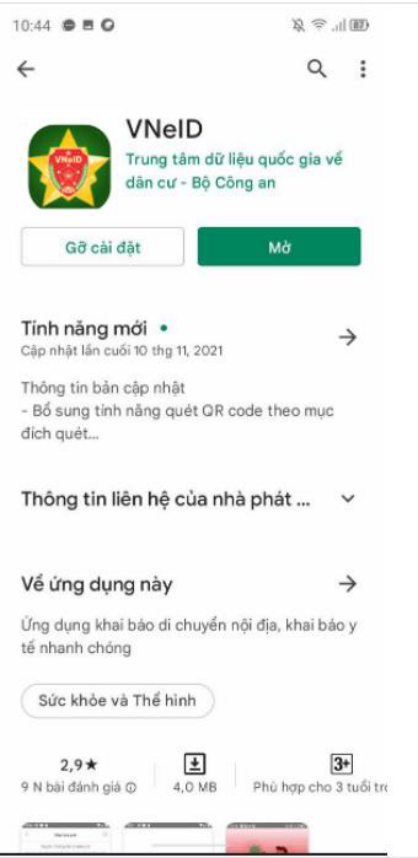
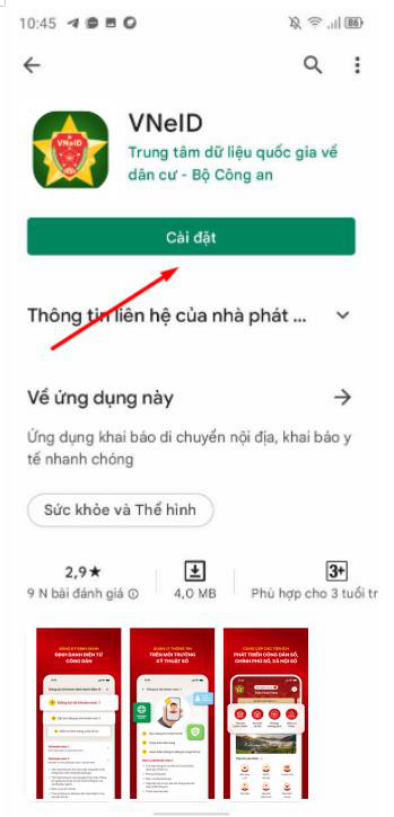

In [9]:
print(md_text[10]['text'])

📄 **Page 9**
# 2. HƯỚNG DẪN SỬ DỤNG

 2.1 Hướng dẫn cài đặt 

 2.1.1 Đối với hệ điều hành Android

 Cài đặt ứng dụng từ CH Play

 -  Bước 1: NSD truy cập ứng dụng CH Play  Tại thanh công cụ tìm kiếm  Tìm từ khoá “VNeID”

 Hình 2.1-1 Tìm kiếm ứng dụng trên CH Play

 - Bước 2: Sau khi App cần tải hiển thị  Chọn “ Cài đặt” để tải App “Ứng
 dụng định danh điện tử - VNeID” về máy.


![](
)

-----

...
📄 **Page 10**
![](
)

# Hình 2.1-2 Cài đặt ứng dụng 

 - Bước 3: NSD chọn “Mở” để mở ứng dụng định danh điện tử - VNeID vừa
 tải.

 -  Bước 4: Sau khi tải về và cài đặt, NSD ấn chạy ứng dụng và ấn “Bắt đầu sử dụng” để tiến hành sử dụng app:


![](
)

-----

...

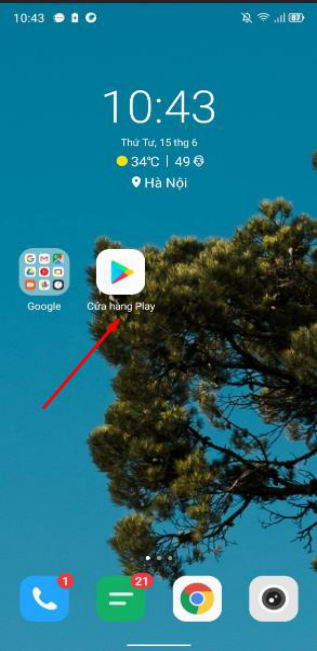
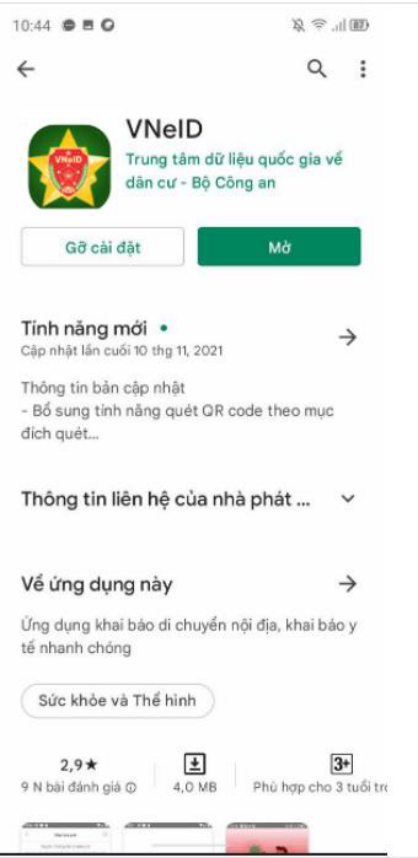
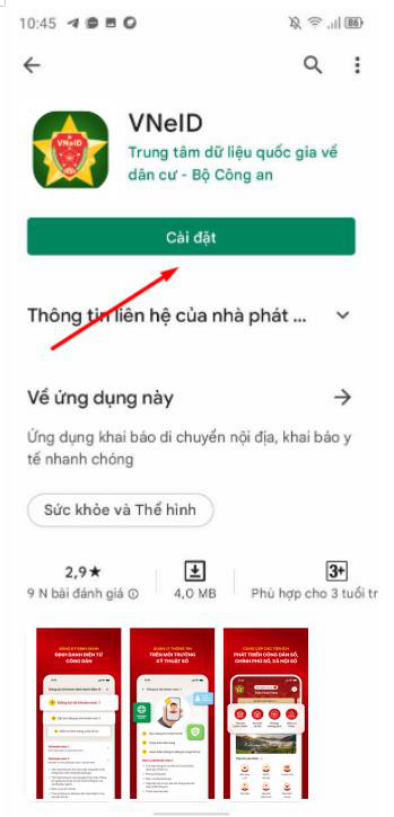

In [12]:
for page, text in enumerate(md_text[9:11]):
    print(f"📄 **Page {page+9}**\n{'='*20}")
    print(f"{text['text']}...")

In [13]:
len(md_text)

136

## Using `langchain-pymupdf4llm`

In [14]:
file_path

'data/vneid.pdf'

In [26]:
from langchain_ollama import ChatOllama
from langchain_pymupdf4llm import PyMuPDF4LLMLoader
from langchain_community.document_loaders.parsers import LLMImageBlobParser

model = ChatOllama(model='qwen2.5:7b', temperature=0)
multimoda = ChatOllama(model='gemma3:4b', temperature=0)

loader = PyMuPDF4LLMLoader(
    file_path=file_path,
    mode='page',
    extract_images=True,
    images_parser=LLMImageBlobParser(model=multimoda)
)

In [ ]:
docs = loader.load()

In [ ]:
docs[10].metadata

{'producer': 'Microsoft® Word 2010',
 'creator': 'Microsoft® Word 2010',
 'creationdate': '2022-08-01T14:18:03+07:00',
 'source': 'data/vneid.pdf',
 'file_path': 'data/vneid.pdf',
 'total_pages': 136,
 'format': 'PDF 1.5',
 'title': '',
 'author': 'Sâm Nhung',
 'subject': '',
 'keywords': '',
 'moddate': '2022-08-01T14:18:03+07:00',
 'trapped': '',
 'modDate': "D:20220801141803+07'00'",
 'creationDate': "D:20220801141803+07'00'",
 'page': 10}

In [ ]:
print(docs[10].page_content)


# Hình 2.1-2 Cài đặt ứng dụng 

 - Bước 3: NSD chọn “Mở” để mở ứng dụng định danh điện tử - VNeID vừa
 tải.

 -  Bước 4: Sau khi tải về và cài đặt, NSD ấn chạy ứng dụng và ấn “Bắt đầu sử dụng” để tiến hành sử dụng app:


